In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [ ]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [ ]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.
    return results


x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)


In [ ]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint = callbacks.ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True)
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])


Epoch 1/20
14/14 [==============================] - 3s 95ms/step - loss: 3.3152 - accuracy: 0.2745 - val_loss: 3.4987 - val_accuracy: 0.5855
Epoch 2/20
 3/14 [=====>........................] - ETA: 0s - loss: 2.4007 - accuracy: 0.4857

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 1s 62ms/step - loss: 2.1579 - accuracy: 0.5527 - val_loss: 3.2231 - val_accuracy: 0.6928
Epoch 3/20
14/14 [==============================] - 1s 61ms/step - loss: 1.7143 - accuracy: 0.6465 - val_loss: 2.9960 - val_accuracy: 0.7124
Epoch 4/20
14/14 [==============================] - 1s 62ms/step - loss: 1.4657 - accuracy: 0.7047 - val_loss: 2.7336 - val_accuracy: 0.7061
Epoch 5/20
14/14 [==============================] - 1s 60ms/step - loss: 1.2713 - accuracy: 0.7360 - val_loss: 2.5120 - val_accuracy: 0.7164
Epoch 6/20
14/14 [==============================] - 1s 61ms/step - loss: 1.1136 - accuracy: 0.7656 - val_loss: 2.3182 - val_accuracy: 0.7084
Epoch 7/20
14/14 [==============================] - 1s 83ms/step - loss: 0.9829 - accuracy: 0.7844 - val_loss: 2.2009 - val_accuracy: 0.7164
Epoch 8/20
14/14 [==============================] - 1s 101ms/step - loss: 0.9137 - accuracy: 0.7941 - val_loss: 1.9239 - val_accuracy: 0.7257
Epoch 9/20
14/14 [=====

<ipython-input-8-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


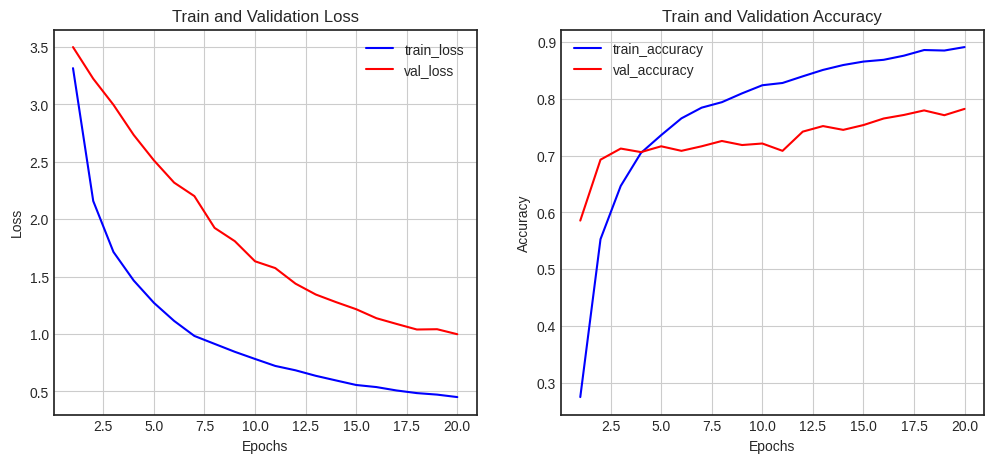

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}')

71/71 [==============================] - 1s 6ms/step - loss: 1.0476 - accuracy: 0.7614
Test Loss: 1.0476024150848389
Test Accuracy: 0.7613534927368164
